<a href="https://colab.research.google.com/github/pamupro/pamupro.github.io/blob/main/lanl_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas matplotlib seaborn ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 64.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 71.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=2cf05c5df7364ee2f4e16c0ed2b702e184f24892d9193c74d800c634a6553585
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0


In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/netflow_day-02.csv"  # Update this with your file name
columns = [
    "Timestamp", "Duration", "Source", "Destination", "Protocol",
    "SourcePort", "DestinationPort", "SourcePackets",
    "DestinationPackets", "SourceBytes", "DestinationBytes"
]
df = pd.read_csv(file_path, names=columns)

# Dataset overview
print("Dataset Overview:")
print(df.info())

# Preview the data
print("\nFirst Few Rows:")
print(df.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546665 entries, 0 to 546664
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Timestamp           546665 non-null  int64  
 1   Duration            546665 non-null  int64  
 2   Source              546665 non-null  object 
 3   Destination         546665 non-null  object 
 4   Protocol            546664 non-null  float64
 5   SourcePort          546664 non-null  object 
 6   DestinationPort     546664 non-null  object 
 7   SourcePackets       546664 non-null  float64
 8   DestinationPackets  546664 non-null  float64
 9   SourceBytes         546664 non-null  float64
 10  DestinationBytes    546664 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 45.9+ MB
None

First Few Rows:
   Timestamp  Duration      Source Destination  Protocol SourcePort  \
0     118781      5580  Comp364445  Comp547245      17.0  Port055

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)

# Drop rows with missing values (if necessary)
df_cleaned = df.dropna()

# Verify the changes
print("\nAfter Handling Missing Values:")
print(df_cleaned.info())



Missing Values:
 Timestamp             0
Duration              0
Source                0
Destination           0
Protocol              1
SourcePort            1
DestinationPort       1
SourcePackets         1
DestinationPackets    1
SourceBytes           1
DestinationBytes      1
dtype: int64

After Handling Missing Values:
<class 'pandas.core.frame.DataFrame'>
Index: 546664 entries, 0 to 546663
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Timestamp           546664 non-null  int64  
 1   Duration            546664 non-null  int64  
 2   Source              546664 non-null  object 
 3   Destination         546664 non-null  object 
 4   Protocol            546664 non-null  float64
 5   SourcePort          546664 non-null  object 
 6   DestinationPort     546664 non-null  object 
 7   SourcePackets       546664 non-null  float64
 8   DestinationPackets  546664 non-null  float64
 9   SourceBytes 

In [ ]:
# Summary statistics
print("\nStatistical Summary:")
print(df_cleaned.describe())

# Protocol distribution
print("\nProtocol Distribution:")
print(df_cleaned["Protocol"].value_counts())



Statistical Summary:
           Timestamp      Duration       Protocol  SourcePackets  \
count  546664.000000  5.466640e+05  546664.000000   5.466640e+05   
mean   120523.515064  1.267110e+06      11.283747   4.557440e+05   
std       173.721700  1.696165e+06       6.681994   2.250092e+07   
min    118781.000000  0.000000e+00       1.000000   0.000000e+00   
25%    120450.000000  1.004600e+05       6.000000   1.631000e+03   
50%    120568.000000  5.769765e+05      17.000000   1.504400e+04   
75%    120635.000000  1.724024e+06      17.000000   5.385125e+04   
max    120694.000000  7.655151e+06      17.000000   2.396174e+09   

       DestinationPackets   SourceBytes  DestinationBytes  
count        5.466640e+05  5.466640e+05      5.466640e+05  
mean         4.143763e+05  1.233027e+08      9.213368e+07  
std          2.668419e+07  4.216303e+09      4.832491e+09  
min          0.000000e+00  0.000000e+00      0.000000e+00  
25%          0.000000e+00  2.227680e+05      0.000000e+00  
50%  

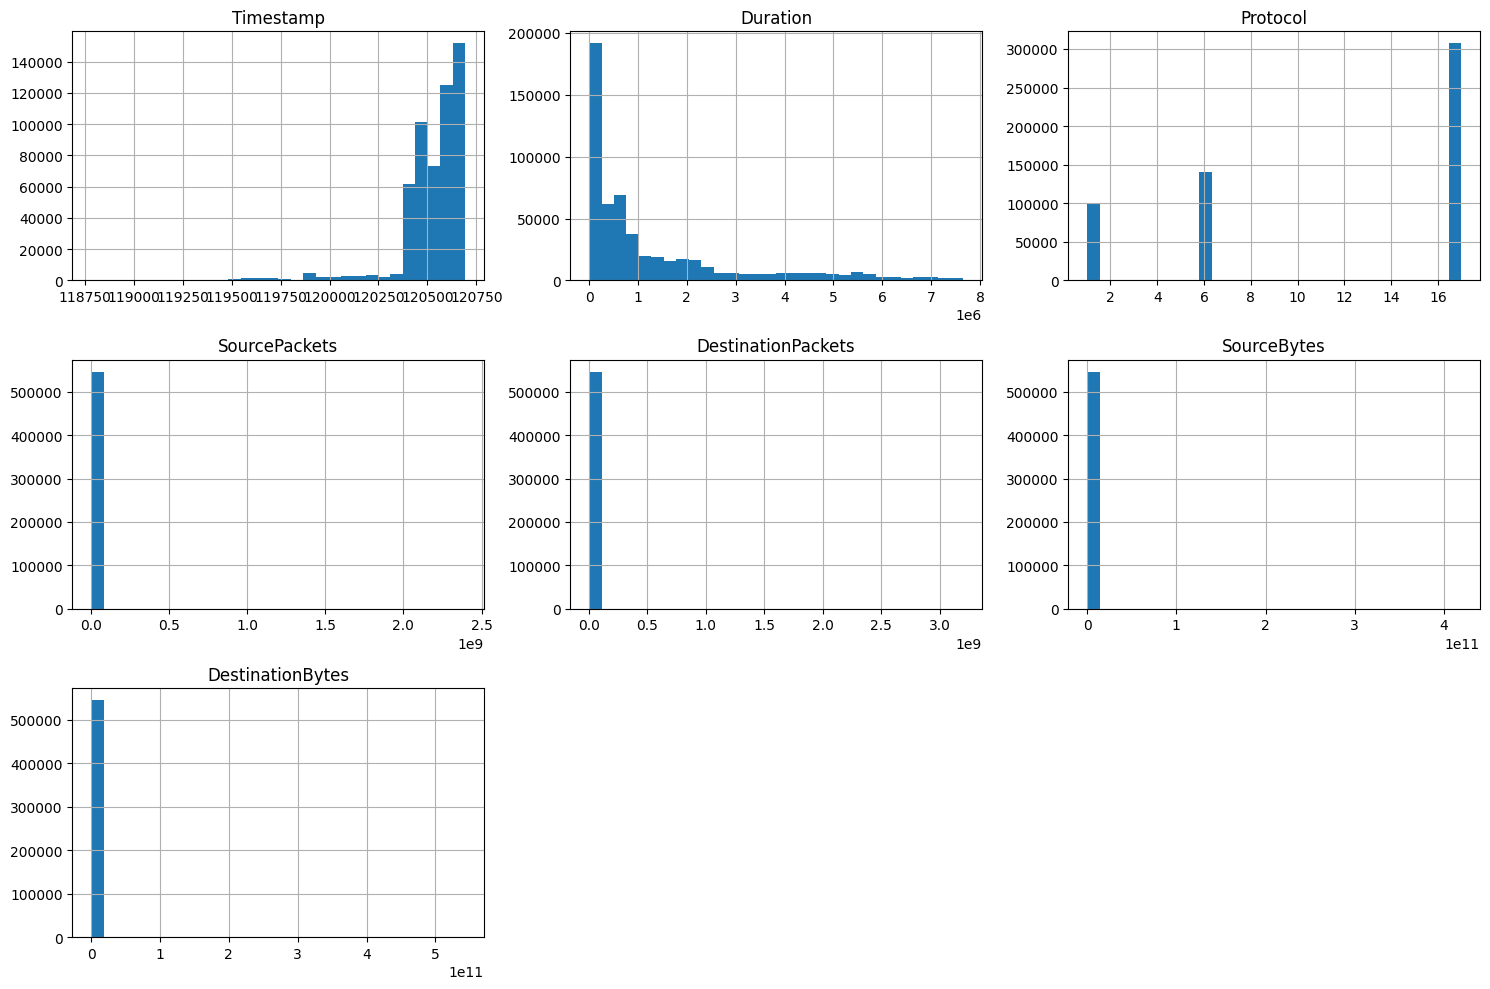

In [ ]:
import matplotlib.pyplot as plt

# Plot histograms for numeric columns
df_cleaned.hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()


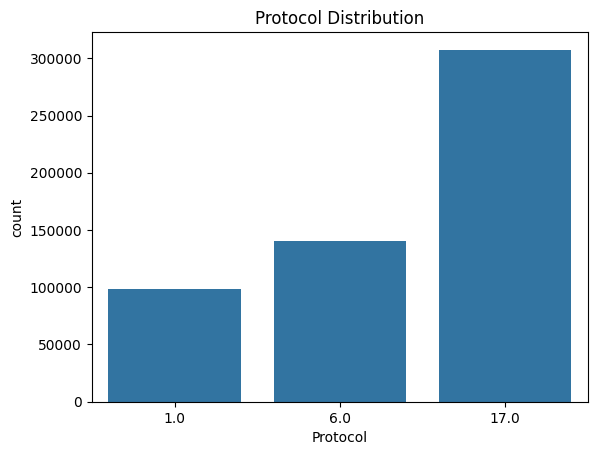

In [ ]:
import seaborn as sns

# Count plot for protocol
sns.countplot(data=df_cleaned, x="Protocol")
plt.title("Protocol Distribution")
plt.show()


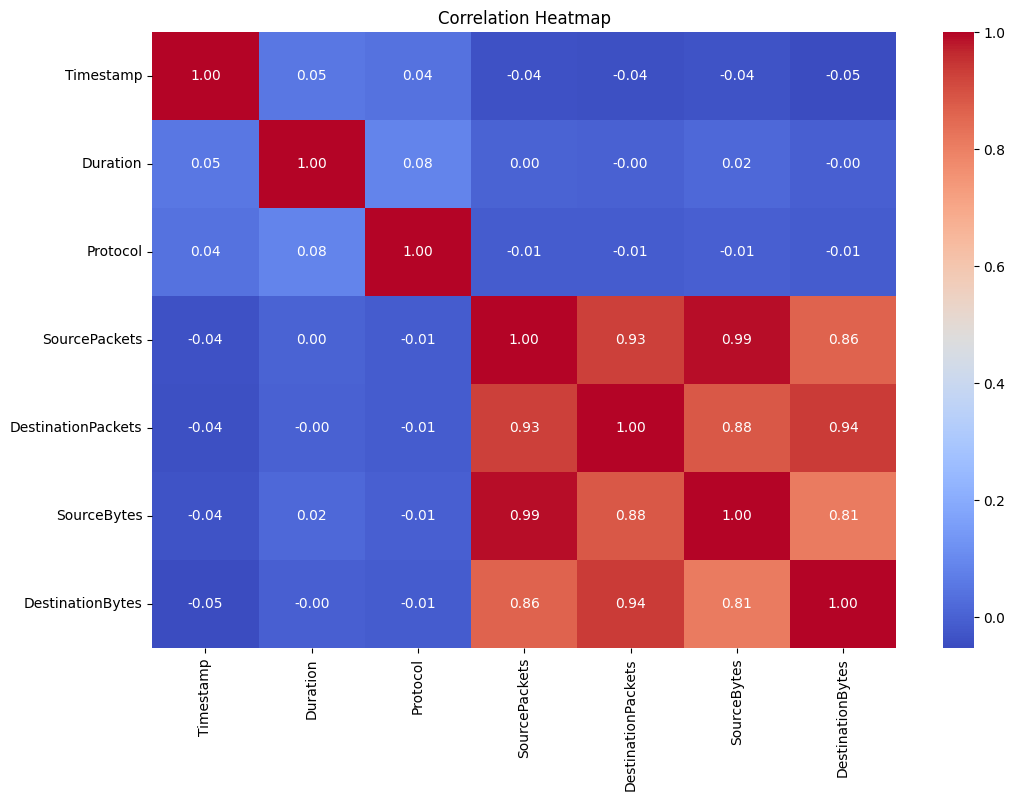

In [ ]:
# Compute correlations and plot heatmap
plt.figure(figsize=(12, 8))
# Select only numeric columns for correlation calculation
numeric_df = df_cleaned.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/netflow_day-02.csv"  # Update this with your file name
columns = [
    "Timestamp", "Duration", "Source", "Destination", "Protocol",
    "SourcePort", "DestinationPort", "SourcePackets",
    "DestinationPackets", "SourceBytes", "DestinationBytes"
]
df = pd.read_csv(file_path, names=columns)

# ... (some code to display overview and preview of data)

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)

# Drop rows with missing values (if necessary)
df_cleaned = df.dropna() # This is where df_cleaned is defined

# ... (some code to verify changes)


Missing Values:
 Timestamp             0
Duration              0
Source                0
Destination           0
Protocol              0
SourcePort            0
DestinationPort       0
SourcePackets         0
DestinationPackets    1
SourceBytes           1
DestinationBytes      1
dtype: int64


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2841576 entries, 0 to 2841575
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Timestamp           int64  
 1   Duration            int64  
 2   Source              object 
 3   Destination         object 
 4   Protocol            float64
 5   SourcePort          object 
 6   DestinationPort     object 
 7   SourcePackets       float64
 8   DestinationPackets  float64
 9   SourceBytes         float64
 10  DestinationBytes    float64
dtypes: float64(5), int64(2), object(4)
memory usage: 238.5+ MB
None

First Few Rows:
   Timestamp  Duration      Source Destination  Protocol SourcePort  \
0     118781      5580  Comp364445  Comp547245      17.0  Port05507   
1     118783      6976  Comp450942  Comp829338       6.0  Port03137   
2     118785     14178    IP564116  Comp141988      17.0       5060   
3     118785     28147    IP564116  Comp141988      17.0       5060   

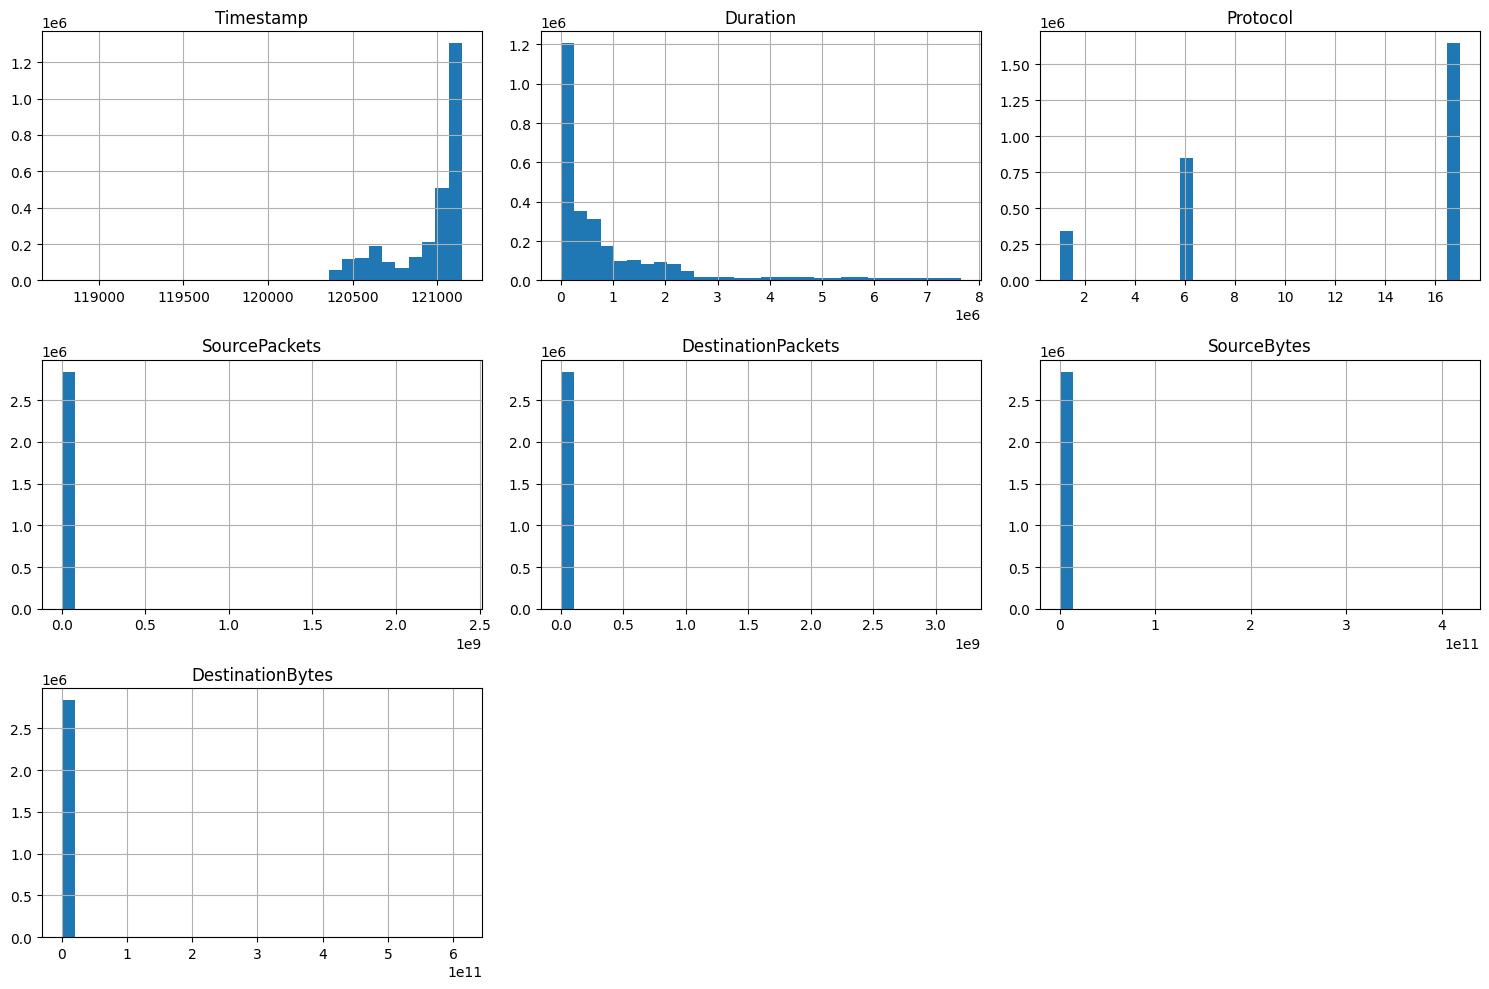

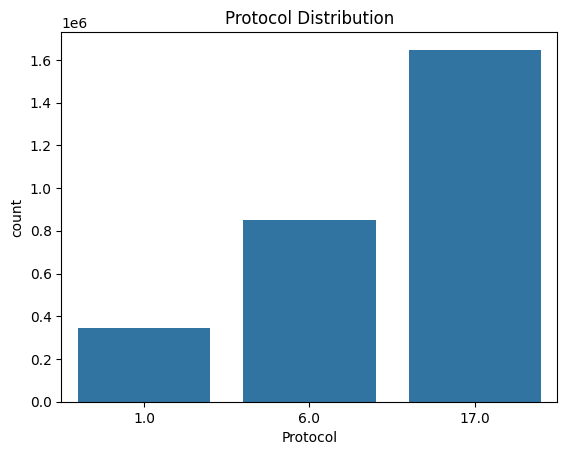

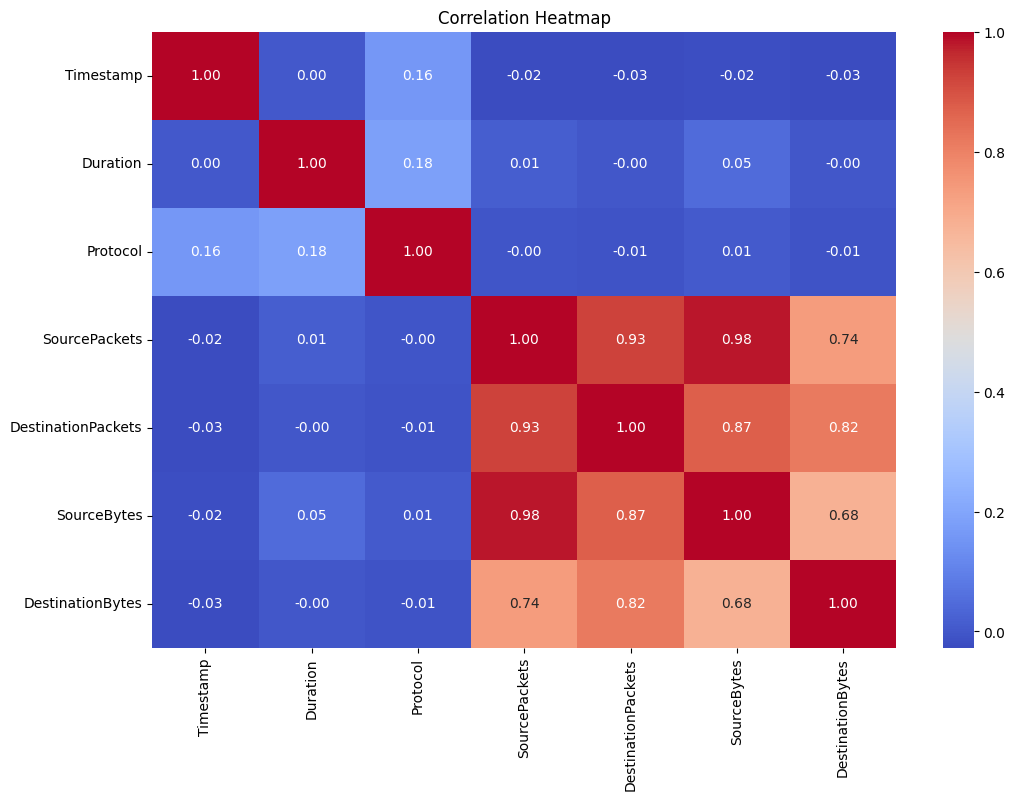

/usr/local/lib/python3.11/dist-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
!pip install pandas matplotlib seaborn ydata-profiling
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

# Load the dataset
file_path = "/content/netflow_day-02.csv"  # Update this with your file name
columns = [
    "Timestamp", "Duration", "Source", "Destination", "Protocol",
    "SourcePort", "DestinationPort", "SourcePackets",
    "DestinationPackets", "SourceBytes", "DestinationBytes"
]
df = pd.read_csv(file_path, names=columns)

# Dataset overview
print("Dataset Overview:")
print(df.info())

# Preview the data
print("\nFirst Few Rows:")
print(df.head())

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)

# Drop rows with missing values (if necessary)
df_cleaned = df.dropna() # This is where df_cleaned is defined

# Verify the changes
print("\nAfter Handling Missing Values:")
print(df_cleaned.info())

# Summary statistics
print("\nStatistical Summary:")
print(df_cleaned.describe())

# Protocol distribution
print("\nProtocol Distribution:")
print(df_cleaned["Protocol"].value_counts())

# Plot histograms for numeric columns
df_cleaned.hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

# Count plot for protocol
sns.countplot(data=df_cleaned, x="Protocol")
plt.title("Protocol Distribution")
plt.show()

# Compute correlations and plot heatmap
plt.figure(figsize=(12, 8))
# Select only numeric columns for correlation calculation
numeric_df = df_cleaned.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Generate a profiling report
profile = ProfileReport(df_cleaned, title="LANL Dataset EDA Report", explorative=True)
profile.to_file("LANL_EDA_Report.html")

print("EDA report saved as 'LANL_EDA_Report.html'")

In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/netflow_day-02.csv"  # Update this with your file name
columns = [
    "Timestamp", "Duration", "Source", "Destination", "Protocol",
    "SourcePort", "DestinationPort", "SourcePackets",
    "DestinationPackets", "SourceBytes", "DestinationBytes"
]
df = pd.read_csv(file_path, names=columns)

# ... (some code to display overview and preview of data)

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)

# Drop rows with missing values (if necessary)
df_cleaned = df.dropna()  # This is where df_cleaned is defined

# ... (some code to verify changes)


Missing Values:
 Timestamp             0
Duration              0
Source                0
Destination           0
Protocol              1
SourcePort            1
DestinationPort       1
SourcePackets         1
DestinationPackets    1
SourceBytes           1
DestinationBytes      1
dtype: int64


In [ ]:
# Save the cleaned dataset
df_cleaned.to_csv("cleaned_file.csv", index=False)

# Download the cleaned file
from google.colab import files
files.download("cleaned_file.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from ydata_profiling import ProfileReport

# Generate a profiling report for the dataframe
profile = ProfileReport(df, title="LANL Dataset Profiling Report", explorative=True)

# Save the report to an HTML file
profile.to_file("LANL_EDA_Report.html")

print("Data profiling report generated and saved as LANL_EDA_Report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
!pip install tqdm #installing tqdm for showing a progress bar
from tqdm import tqdm
import pandas as pd
from ydata_profiling import ProfileReport

# Load the dataset
file_path = "/content/netflow_day-02.csv"  # Update this with your file name
columns = [
    "Timestamp", "Duration", "Source", "Destination", "Protocol",
    "SourcePort", "DestinationPort", "SourcePackets",
    "DestinationPackets", "SourceBytes", "DestinationBytes"
]
df = pd.read_csv(file_path, names=columns) # df is defined here before being used

chunk_size = 10000  # Adjust as needed
num_chunks = len(df) // chunk_size + 1

for i in tqdm(range(num_chunks), desc="Profiling chunks"):
    start = i * chunk_size
    end = min((i + 1) * chunk_size, len(df))
    chunk = df[start:end]

    profile = ProfileReport(chunk, title=f"LANL Dataset Profiling Report - Chunk {i+1}", explorative=True, minimal=True)
    profile.to_file(f"LANL_EDA_Report_Chunk_{i+1}.html")

print("Data profiling report generated in chunks.")

ModuleNotFoundError: No module named 'ydata_profiling'

In [ ]:
import pandas as pd
df = pd.read_csv('/content/netflow_day-02.csv')


In [ ]:
print(df.head())
print(df.info())

   118781   5580  Comp364445  Comp547245    17  Port05507 Port46272       0  \
0  118783   6976  Comp450942  Comp829338   6.0  Port03137       445  1665.0   
1  118785  14178    IP564116  Comp141988  17.0       5060      5060  1866.0   
2  118785  28147    IP564116  Comp141988  17.0       5060      5060  3326.0   
3  118785  48507    IP564116  Comp141988  17.0       5060      5060  5423.0   
4  118785  63173    IP564116  Comp141988  17.0       5060      5060  7061.0   

   755065        0.1  1042329018  
0  1108.0   300810.0    250408.0  
1     0.0  1477041.0         0.0  
2     0.0  2656305.0         0.0  
3     0.0  4388449.0         0.0  
4     0.0  5745536.0         0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4624784 entries, 0 to 4624783
Data columns (total 11 columns):
 #   Column      Dtype  
---  ------      -----  
 0   118781      int64  
 1   5580        int64  
 2   Comp364445  object 
 3   Comp547245  object 
 4   17          float64
 5   Port05507   object 
 6

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

118781        0
5580          0
Comp364445    0
Comp547245    1
17            1
Port05507     1
Port46272     1
0             1
755065        1
0.1           1
1042329018    1
dtype: int64


In [ ]:
df_cleaned = df.dropna()

In [ ]:
summary_stats = df_cleaned.describe()
print(summary_stats)


             118781          5580            17             0        755065  \
count  4.624783e+06  4.624783e+06  4.624783e+06  4.624783e+06  4.624783e+06   
mean   1.210580e+05  8.736576e+05  1.153354e+01  1.046226e+05  6.031481e+04   
std    2.371116e+02  1.458704e+06  6.480420e+00  7.769369e+06  9.225444e+06   
min    1.187830e+05  0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00   
25%    1.210090e+05  3.197800e+04  6.000000e+00  2.380000e+02  0.000000e+00   
50%    1.211290e+05  2.900540e+05  1.700000e+01  2.982000e+03  0.000000e+00   
75%    1.211920e+05  8.954250e+05  1.700000e+01  2.808800e+04  3.000000e+00   
max    1.213590e+05  7.655151e+06  1.700000e+01  2.396174e+09  3.201805e+09   

                0.1    1042329018  
count  4.624783e+06  4.624783e+06  
mean   4.147228e+07  1.995944e+07  
std    1.465260e+09  2.025037e+09  
min    0.000000e+00  0.000000e+00  
25%    2.201100e+04  0.000000e+00  
50%    8.535040e+05  0.000000e+00  
75%    8.435320e+06  1.730000e+02  


In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/netflow_day-02.csv"  # Update this with your file name
columns = [
    "Timestamp", "Duration", "Source", "Destination", "Protocol",
    "SourcePort", "DestinationPort", "SourcePackets",
    "DestinationPackets", "SourceBytes", "DestinationBytes"
]
df = pd.read_csv(file_path, names=columns) # Define 'df' by reading your data

missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

Missing Values in Each Column:
 Timestamp             0
Duration              0
Source                0
Destination           0
Protocol              0
SourcePort            0
DestinationPort       1
SourcePackets         1
DestinationPackets    1
SourceBytes           1
DestinationBytes      1
dtype: int64


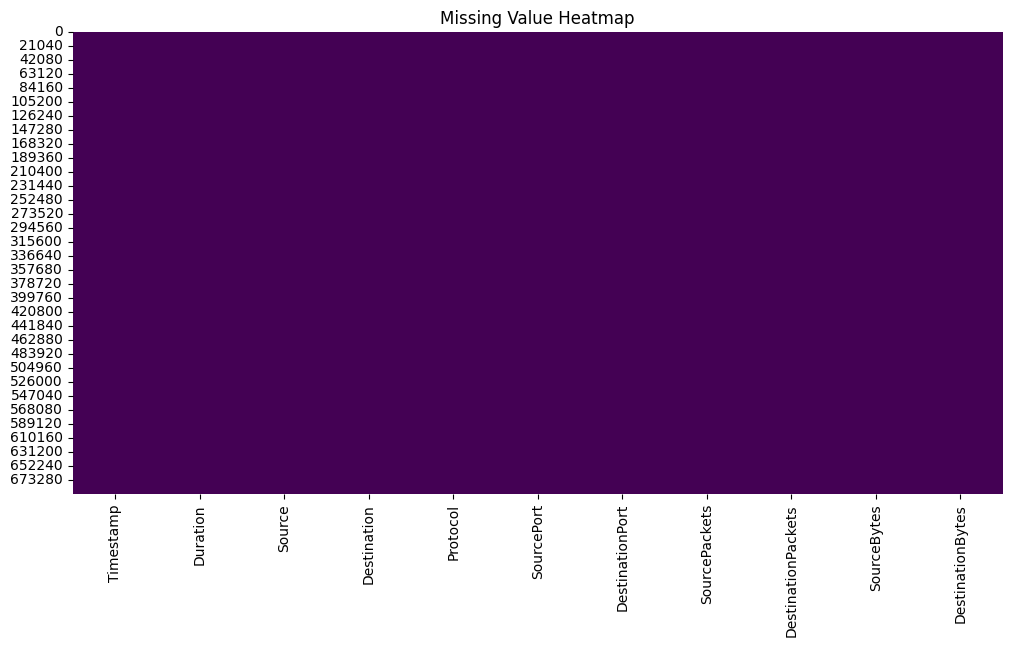

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate heatmap for missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Value Heatmap")
plt.show()


In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/netflow_day-02.csv"  # Update this with your file name
columns = [
    "Timestamp", "Duration", "Source", "Destination", "Protocol",
    "SourcePort", "DestinationPort", "SourcePackets",
    "DestinationPackets", "SourceBytes", "DestinationBytes"
]

missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

# Drop rows with missing values (if necessary)
df_cleaned = df.dropna()  # Define 'df_cleaned' before using it

summary_stats = df_cleaned.describe()
print(summary_stats)


Missing Values in Each Column:
 Timestamp             0
Duration              0
Source                0
Destination           0
Protocol              0
SourcePort            0
DestinationPort       1
SourcePackets         1
DestinationPackets    1
SourceBytes           1
DestinationBytes      1
dtype: int64
           Timestamp      Duration       Protocol  SourcePackets  \
count  694316.000000  6.943160e+05  694316.000000   6.943160e+05   
mean   120573.003422  1.134187e+06      10.815858   3.696728e+05   
std       182.161715  1.624837e+06       6.714666   1.999294e+07   
min    118781.000000  0.000000e+00       1.000000   0.000000e+00   
25%    120468.000000  6.135300e+04       6.000000   7.810000e+02   
50%    120601.000000  4.829410e+05      17.000000   8.976000e+03   
75%    120673.000000  1.437760e+06      17.000000   4.098800e+04   
max    120840.000000  7.655151e+06      17.000000   2.396174e+09   

       DestinationPackets   SourceBytes  DestinationBytes  
count        6.943

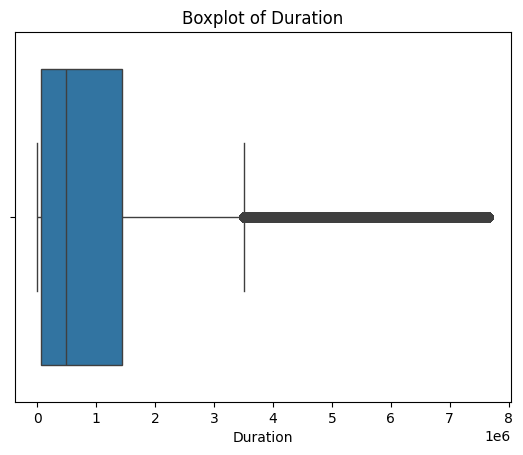

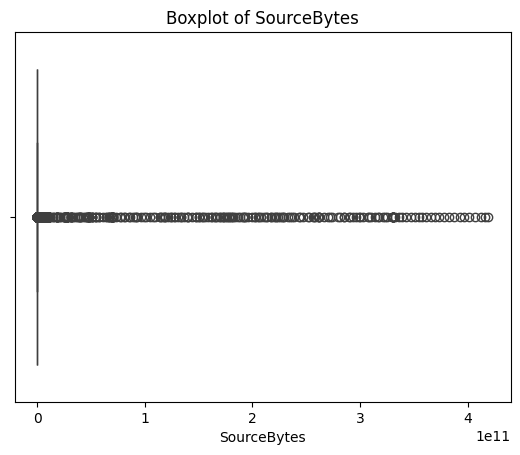

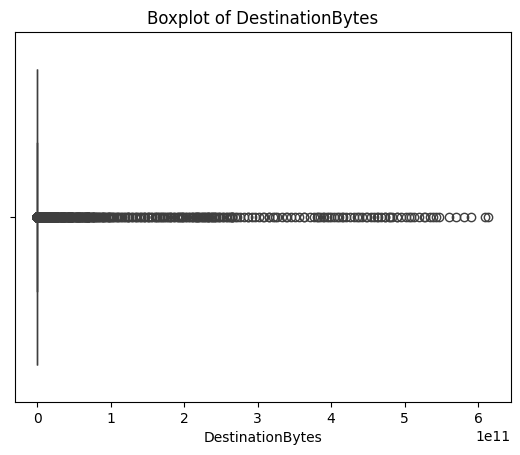

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for Duration
sns.boxplot(x=df_cleaned['Duration'])
plt.title('Boxplot of Duration')
plt.show()

# Boxplot for SourceBytes
sns.boxplot(x=df_cleaned['SourceBytes'])
plt.title('Boxplot of SourceBytes')
plt.show()

# Boxplot for DestinationBytes
sns.boxplot(x=df_cleaned['DestinationBytes'])
plt.title('Boxplot of DestinationBytes')
plt.show()


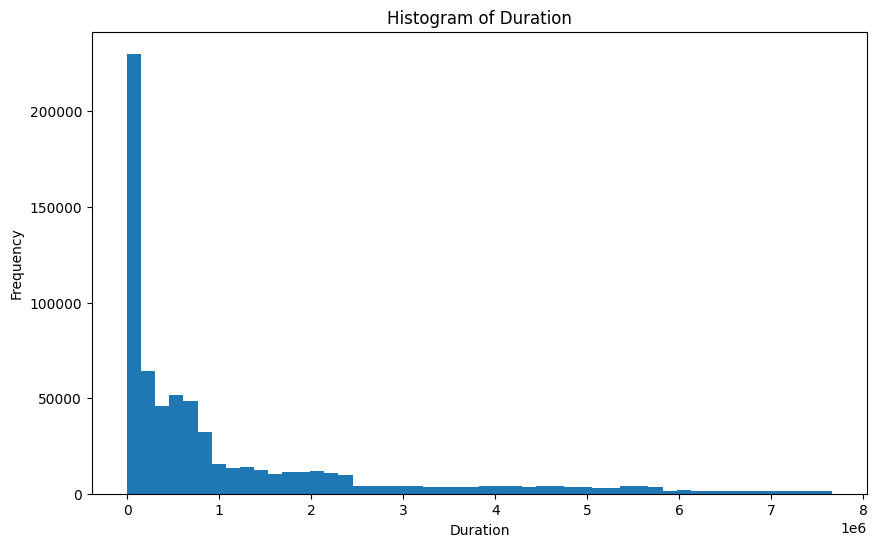

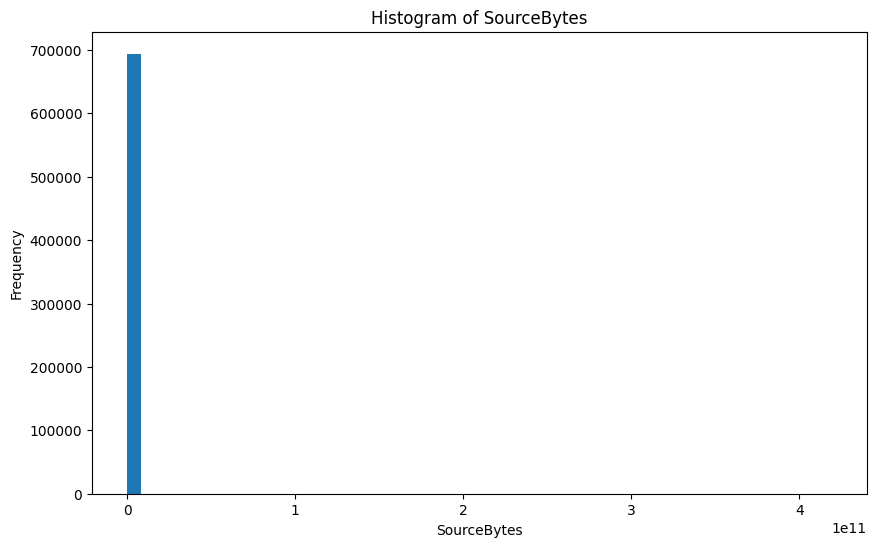

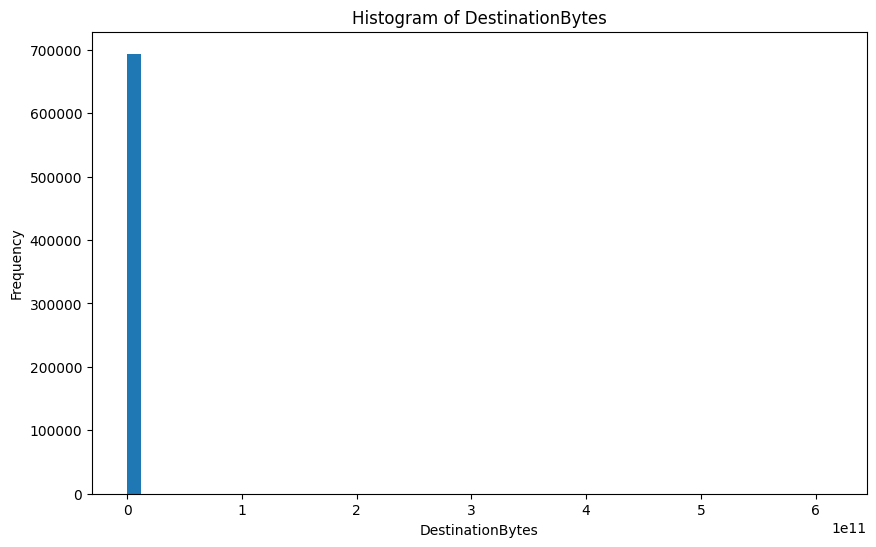

In [ ]:
# Histogram for Duration
df_cleaned['Duration'].plot(kind='hist', bins=50, figsize=(10, 6), title='Histogram of Duration')
plt.xlabel('Duration')
plt.show()

# Histogram for SourceBytes
df_cleaned['SourceBytes'].plot(kind='hist', bins=50, figsize=(10, 6), title='Histogram of SourceBytes')
plt.xlabel('SourceBytes')
plt.show()

# Histogram for DestinationBytes
df_cleaned['DestinationBytes'].plot(kind='hist', bins=50, figsize=(10, 6), title='Histogram of DestinationBytes')
plt.xlabel('DestinationBytes')
plt.show()


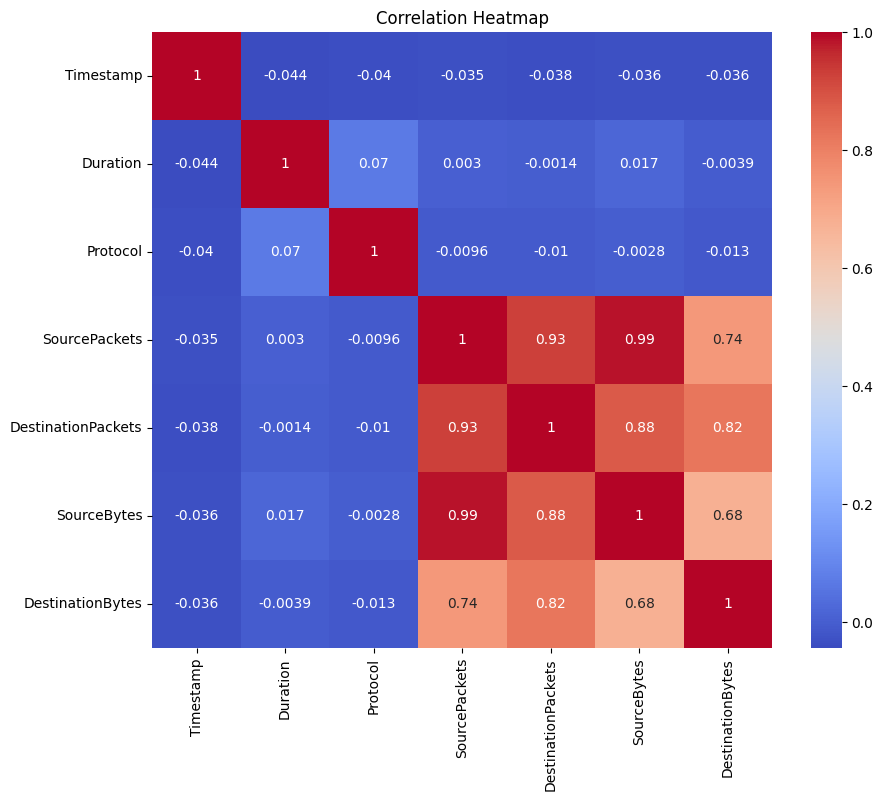

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))

numeric_df = df_cleaned.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Install ydata-profiling if not already installed
!pip install ydata-profiling

# Import the library
from ydata_profiling import ProfileReport
import pandas as pd # Import pandas


# Load the dataset
file_path = "/content/netflow_day-02.csv"  # Update this with your file name
columns = [
    "Timestamp", "Duration", "Source", "Destination", "Protocol",
    "SourcePort", "DestinationPort", "SourcePackets",
    "DestinationPackets", "SourceBytes", "DestinationBytes"
]
df = pd.read_csv(file_path, names=columns) # Load the dataframe

# Clean the dataset (drop rows with missing values)
df_cleaned = df.dropna()  # Now df_cleaned is defined

# Generate the profiling report
profile = ProfileReport(df_cleaned, title="LANL Dataset EDA Report", explorative=True)

# Save the report as an HTML file
profile.to_file("LANL_EDA_Report.html")

# Code to download the HTML file in Google Colab
from google.colab import files
files.download("LANL_EDA_Report.html")

/usr/local/lib/python3.11/dist-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>